In [60]:
from PIL import Image  # Import the Image module from Pillow
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

In [61]:
# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist['data'], mnist['target']

# Preprocess the Data
X = X / 255.0  # Normalize pixel values to [0, 1]
y = y.astype(np.uint8)  # Convert labels to integers

#  Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data for SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [62]:
# Train Different Classifiers

# 1. Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)


In [63]:
logisticRegression = LogisticRegression().fit(X_train, y_train)
y_pred_logistic = logisticRegression.predict(X_test)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)


In [64]:

# --- STEP 0: Prepare sample data (you would use your own data here) ---
X, y = make_classification(n_samples=100, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1)

# --- STEP 1: Load the MLP model ---
# Create an instance of the MLPClassifier with desired settings
# (hidden_layer_sizes, activation, solver, etc.)
mlp = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42)

# --- STEP 2: Fit the model to your training data ---
mlp.fit(X_train, y_train)

# Now your model is trained and ready for predictions
# For example, to print the training accuracy:
print(f"Training accuracy: {mlp.score(X_train, y_train):.2f}")


Training accuracy: 1.00


In [65]:
y_pred_mlp = mlp.predict(X_test)


accuracy_mlp = accuracy_score(y_test, y_pred_mlp)


In [66]:
# Step 6: Print Accuracy Results
print(f'Logistic Regression: {accuracy_logistic * 100:.2f}%')
print(f'Random Forest Accuracy: {accuracy_rf * 100:.2f}%')
print(f'MLP Accuracy: {accuracy_mlp * 100:.2f}%')

Logistic Regression: 92.03%
Random Forest Accuracy: 96.71%
MLP Accuracy: 88.00%


In [67]:
# Set up the environment
!git clone https://github.com/ultralytics/yolov5  # Clone the YOLOv5 repo
%cd yolov5
!pip install -r requirements.txt  # Install requirements

# Import libraries
import torch
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load a pre-trained YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')  # Load YOLOv5s model (small)


Cloning into 'yolov5'...
remote: Enumerating objects: 17639, done.
remote: Counting objects: 100% (38/38), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 17639 (delta 11), reused 8 (delta 8), pack-reused 17601 (from 3)
Receiving objects: 100% (17639/17639), 17.01 MiB | 12.34 MiB/s, done.
Resolving deltas: 100% (11990/11990), done.
/Users/frisky/yolov5/yolov5/yolov5/yolov5/yolov5


Using cache found in /Users/frisky/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2025-10-28 Python-3.12.9 torch-2.7.1 CPU

100%|██████████████████████████████████████| 14.1M/14.1M [00:00<00:00, 19.1MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [9]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


/Users/frisky/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


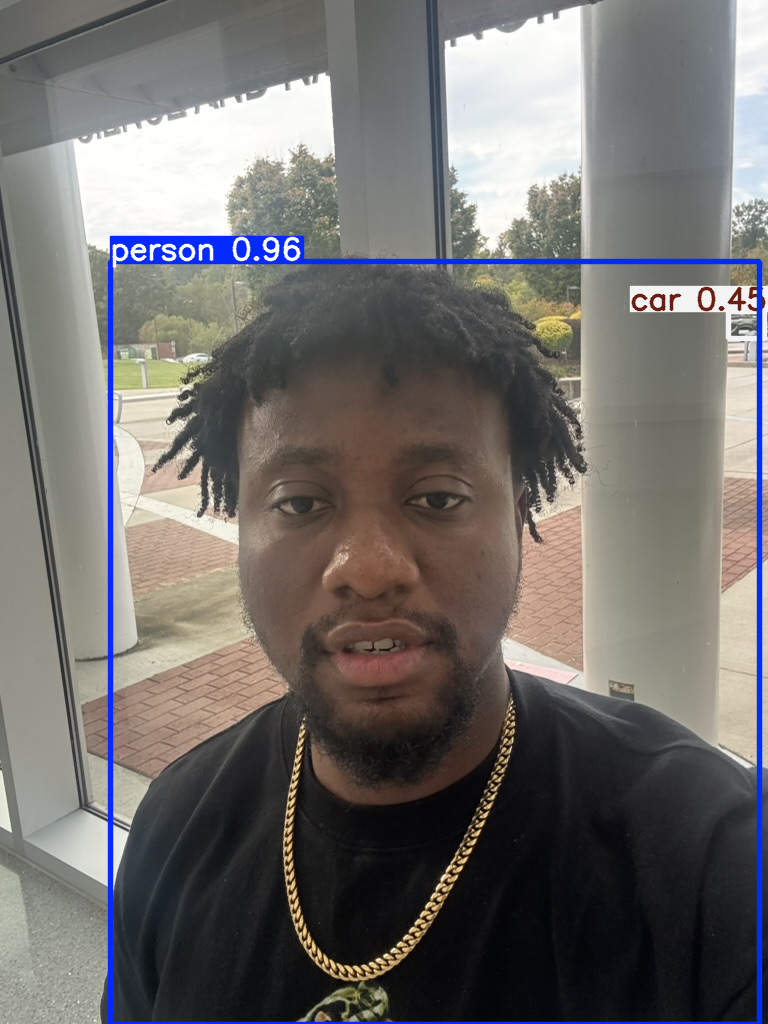

TypeError: Image data of dtype <U35 cannot be converted to float

In [59]:
image_path = os.path.join(os.path.expanduser('~'), 'Downloads', 'Joshua.jpeg')
image = image_path

# Resize the image
resized_image = image

# Convert the resized image to a format compatible with the model (e.g., NumPy array)
# If your model requires a specific input format, you may need to adjust the image further.
img_array = np.array(resized_image)

# Perform inference
results = model(resized_image)

# Show results
results.show()  # This will display the image with detections

# If you want to visualize the resized image
plt.imshow(resized_image)
plt.axis('off')
plt.title('Resized Image')
plt.show()